<center><h1>Analisis Exploratorio de los Datos - Parte 2</h1></center>

En este apartado se propone analizar patrones dentro de los datos proporcionados buscando reconocer las distribuciones de las víctimas en función del tiempo, de la cantidad de accidentes, de las caracteristicas de las victimas, de los roles involucrados y el punto de ocurrencia de los hechos.

Para una lectura mas clara y ordenada en el archivo [Utils.py](Utils.py) se brindaran todas las funciones que utilizamos para realizar los graficos y demas informacion.

Realizamos las importacion y leemos el DataFrame

In [123]:
import pandas as pd
from Utils import * 
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
df_homicidios = pd.read_csv('./Data/homicidios_limpio.csv')

## Distribucion mensual

observamos la distribucion mensual de los accidentes fatales y se compara con los años 

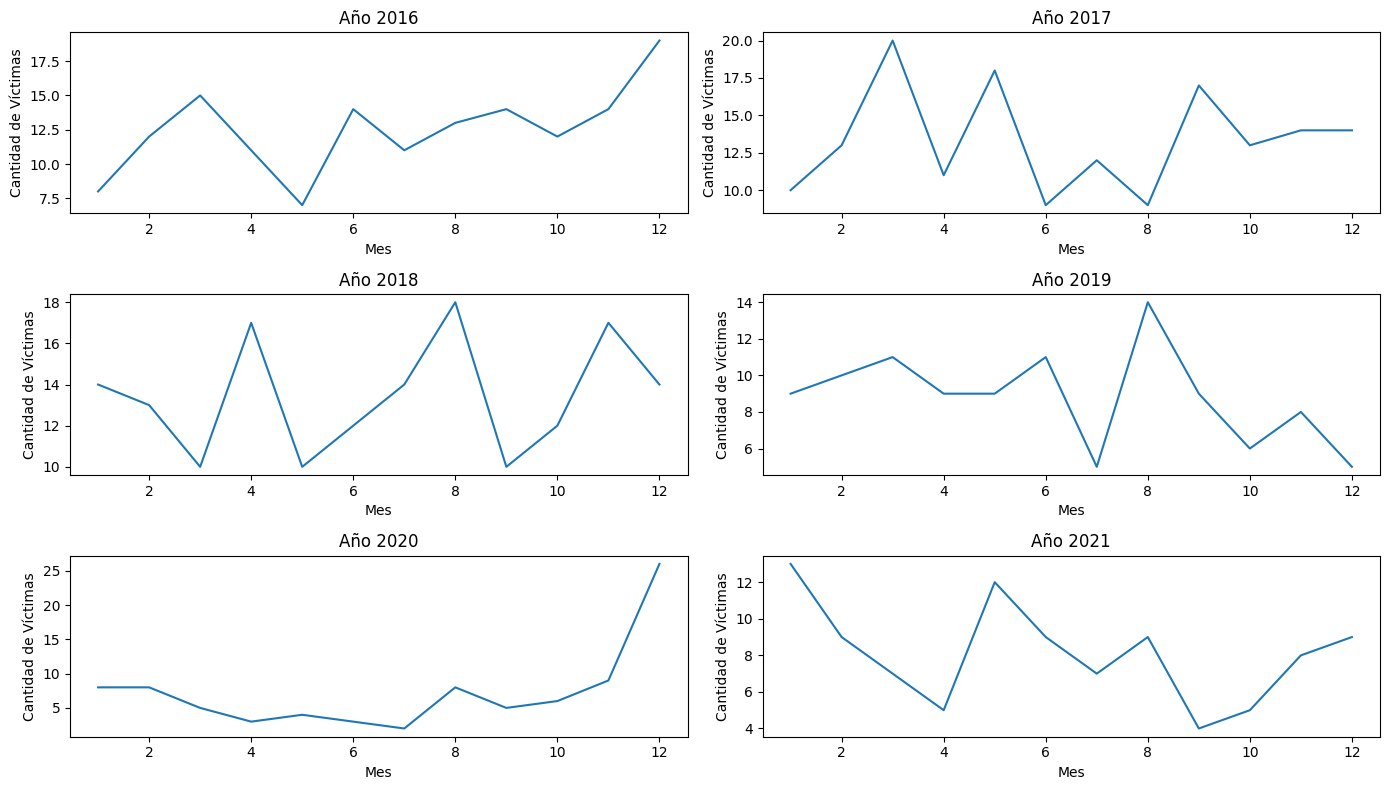

In [125]:
grafico_distribucion_mensual_por_ano(df_homicidios)

De las gráficas anteriores, no se observa un patrón a lo largo del año comparando entre los distintos años. Los picos de accidentes fatales no se observan en los mismos meses en los distintos años registrados. Lo que se observa con claridad es la disminución notable de accidentes fatales desde Diciembre de 2019 hasta Noviembre de 2020, podemos suponer que es debido a las medidas de cuarentena por la pandemia COVID-19.

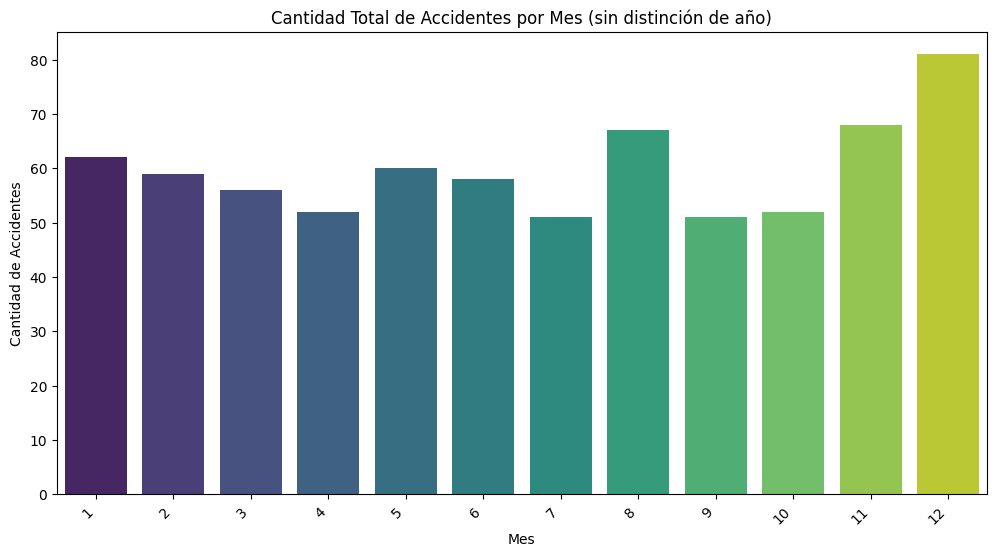

In [126]:
cantidad_total_accidentes_por_mes(df_homicidios)

Si se considera la distribución anual de todos los registros disponibles, se puede observar que el patrón que extiste a lo largo del año es un pico de accidentes en el mes de diciembre, siendo los meses con mas accidentes fatales Diciembre, Noviembre y Agosto. El mes con menos cantidad de accidentes fatales registrados es Julio y Septiembre.

### Distribución semanal

Ahora buscamos patrones en la cantidad de accidentes a lo largo de la semana

El día de la semana con menor cantidad de víctimas tiene 101 víctimas
El día de la semana con mayor cantidad de víctimas tiene 117 víctimas
La diferencia porcentual es de 15.84


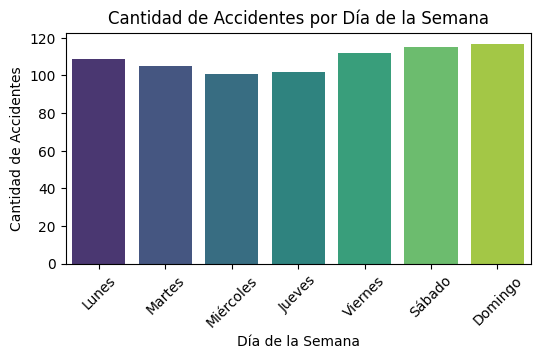

In [127]:
accidentes_por_dia_semana(df_homicidios)

Considerando el total de los registros, la distribución de los accidentes tienden a registrarse entre los viernes a lunes, con el máximo regritrado el día Sábado y el mínimo el día Jueves. Sin embargo, la diferencia entre las cantidades mínima y máxima registrada en la semana es del 11.5% solamente.

### Distribución por momento del día

Para este análisis se creó una nueva columna donde se caracterizaran los diferentes momentos del día con el siguiente criterio:

* **Mañana**: de 6:00 a 10:59
* **Medio día**: de 11:00 a 13:59
* **Tarde**: de 14:00 a 18:59
* **Noche**: de 19:00 a 23:59
* **Madrugada**: de 24:00 a 05:59

A continuación, se observa la distribución de la cantidad de accidentes en cada una de estas categorías.

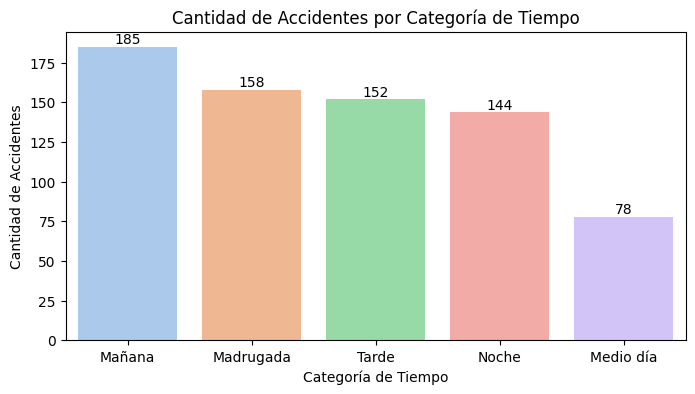

In [128]:
cantidad_accidentes_por_categoria_tiempo(df_homicidios)

Se pueden apreciar que casi el 26% de los accidentes ocurren durante la mañana, donde la actividad laboral es alta. En el mediodía se registra un porcentaje considerablemente menor de cantidad de accidentes fatales respecto a los otros momentos del día.

Ahora, para mayor detalle, se observa la distribución horaria de los accidentes.

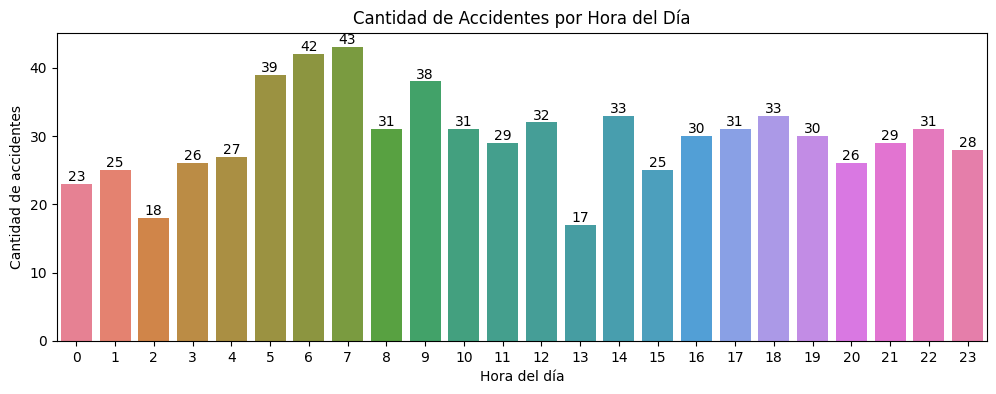

In [129]:
cantidad_accidentes_por_horas_del_dia(df_homicidios)

Con mas detalle, observando hora a hora la distribución de los accidentes, es posible identificar el horario entre las 5 a las 8 de la mañana como el de mayor cantidad de accidentes. Luego se observa un poco a las 9 de la mañana seguido de tres momentos puntuales como lo son las 14 hs, las 18 hs y las 22 hs.

### Distribución días de la semana vs fines de semana

Lo que se busca en este punto es comparar la cantidad de accidentes en los días de semana (es decir, de lunes a viernes) y los fines de semana (sábado y domingo).

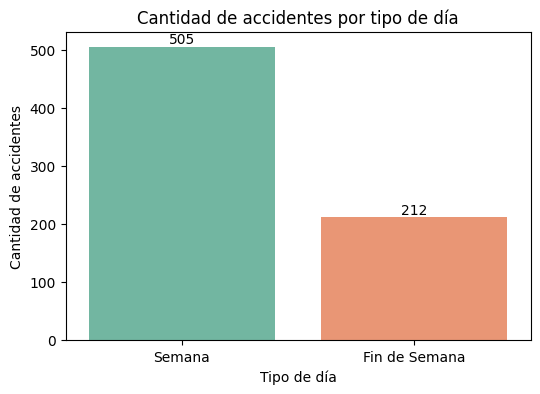

In [130]:
cantidad_accidentes_semana_fin_de_semana(df_homicidios)

Del gráfico anterior se puede ver que la mayor cantidad de accidentes registrados fue durante la semana, siendo algo menos de la mitad los ocurridos el fin de semana. Esto contrasta con lo observado en el anterior análisis, donde se vieron las mayores cantidades entre el viernes y el lunes, aunque al acumular de lunes a viernes es una sola medida, es que los días de semana acumulan mas que los fines de semana.

### Edad de las víctimas

En este punto se busca entender el patrón de distribución de las edades de las víctimas. En los siguientes gráficos se muestra el histograma de edades uy un boxplot para entender su distribución de las mismas.

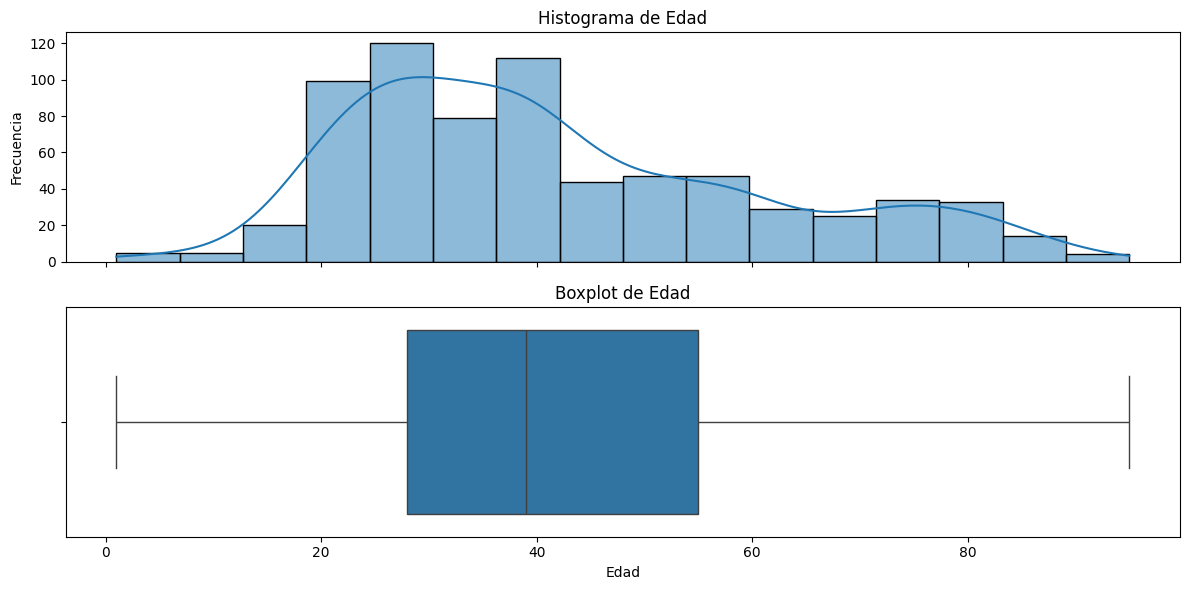

In [131]:
distribucion_edad(df_homicidios)

Se puede apreciar en los gráficos anteriores, que el 75% de los accidentados es menor de 55 años, con una mediana de 39 años. No se observan edades atípicas. Si bien se observa un mínimo de 1 año y un máximo de 95 años, esto tiene que ver con el registro de todas las víctimas, no necesariamente son las que manejaban al momento del accidente. El histograma se observa con una distribución algo sesgada a la derecha, concentrando la mayor cantidad de accidentes entre los 20 a 40 años.


Se puede ver en detalle la distribución de las edades por año.

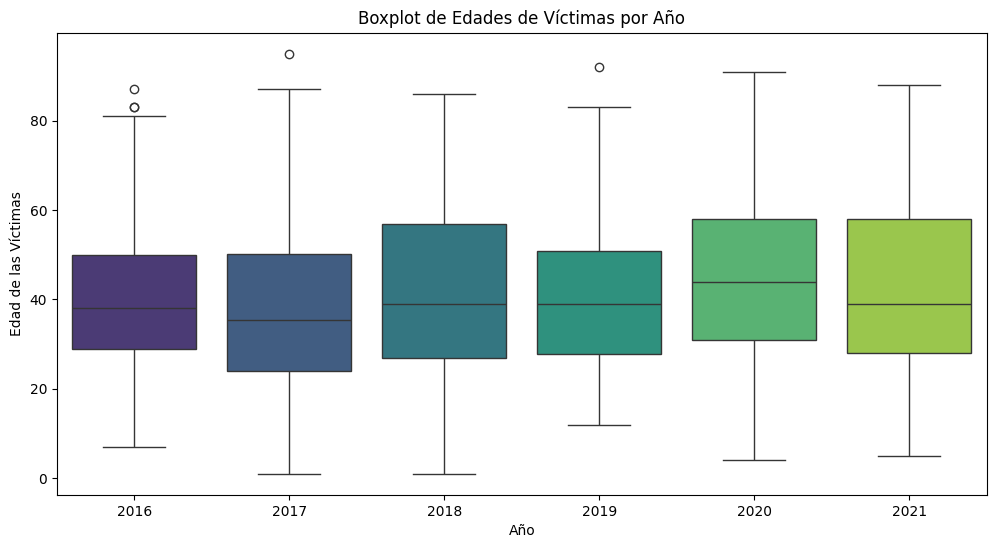

In [132]:
distribucion_edad_por_anio(df_homicidios)

Las distribuciones de las edades se comportan muy parecido en los años registrados, con una mediana alrededor de los 40 años. Se observan algunos valores atípicos que tienen que ver con aultos mayores víctimas de los accidentes en los años 2016, 2017 y 2019.

Una relación interesante a ver es la variación entre los grupos de Masculinos y Femeninos según la edad.

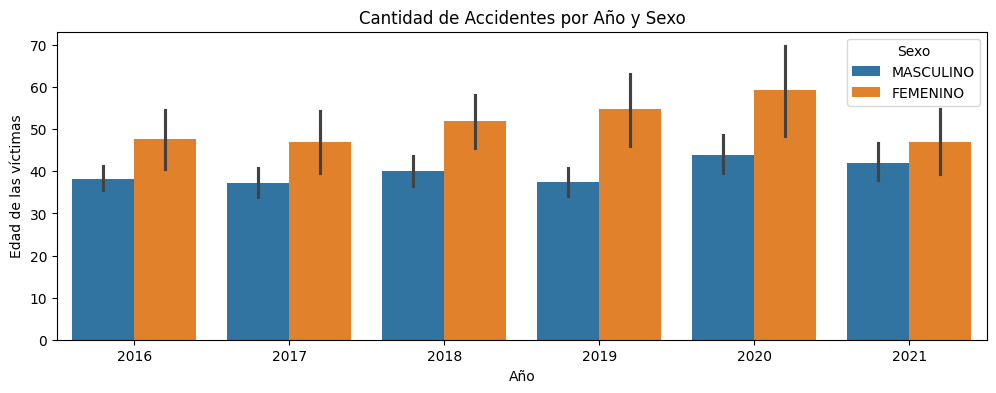

In [133]:
cantidades_accidentes_por_anio_y_sexo(df_homicidios)

In [134]:
# Se observan los datos numéricos de ese gráfico
resumen_sexo_año = df_homicidios.groupby(['Año', 'Sexo']).size().reset_index(name='Cantidad accidentes')
resumen_sexo_año

,Año,Sexo,Cantidad accidentes
0,2016,FEMENINO,27
1,2016,MASCULINO,119
2,2017,FEMENINO,36
3,2017,MASCULINO,104
4,2018,FEMENINO,38
5,2018,MASCULINO,111
6,2019,FEMENINO,27
7,2019,MASCULINO,77
8,2020,FEMENINO,16
9,2020,MASCULINO,65


En el gráfico anterior se puede ver que hasta el 2020 había una tendencia creciente en las edades de las mujeres fallecidas que en hombres, con edades entre los 40 y 50 años, disminuyendo para 2021. En cuanto a los hombres, se observa una leve tendencia al aumento de la edad de fallecimientos pero sostenida alrededor de los 40 años de edad, pero igualmente menor edad que en mujeres.


Continuando con el análisis de las edades, resulta interesante analizar cómo se distribuyen las edades para la condición de la victima, es decir el 'rol' en el hecho.

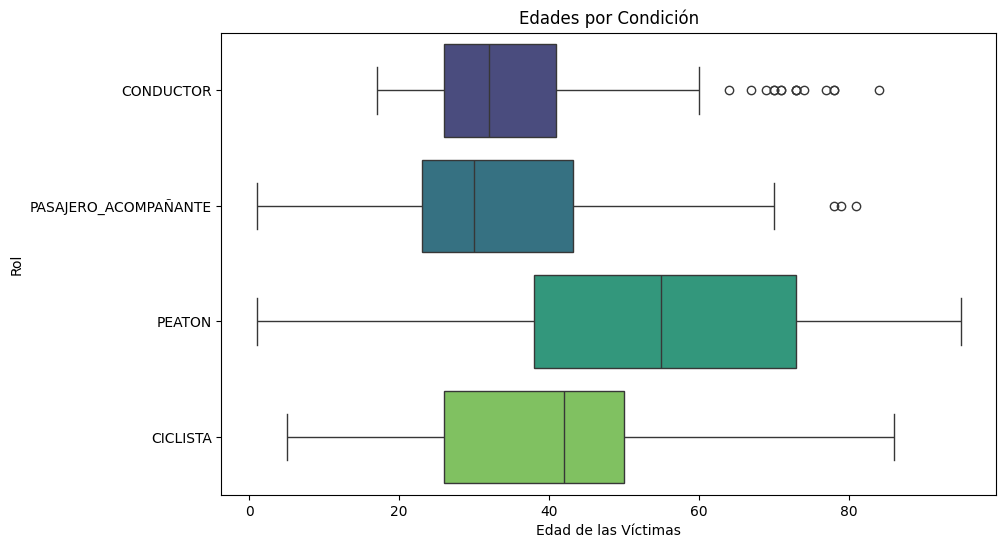

In [135]:
edad_y_rol_victimas(df_homicidios)

De las edades promedio que se obeservan en los cuatro roles analizados, se encuentra que es similar la edad del conductor de auto y del pasajero acompañante, siendo de alrededor de los 35 años. Se observa que la edad mínima del conductor es de alrededor de los 18 años, pero en los demás roles es posible encontrar victimas de menor edad, lo que se se relaciona con ser niños que estan siendo trasladados. 

En el caso de los peatones se observa mayor dispersión de las edades, desde niños muy pequeños a adultos mayores de cerca de los 90 años.

Si bien en conductor y pasajero acompañante se observan algunos valores atípicos, los mismos son edades esperables y se consideran casos especiales en el conjunto de datos.

Finalmente, se analiza la relación de la edad con los distintos vehículos que ocupaba la victima o si era peatón.

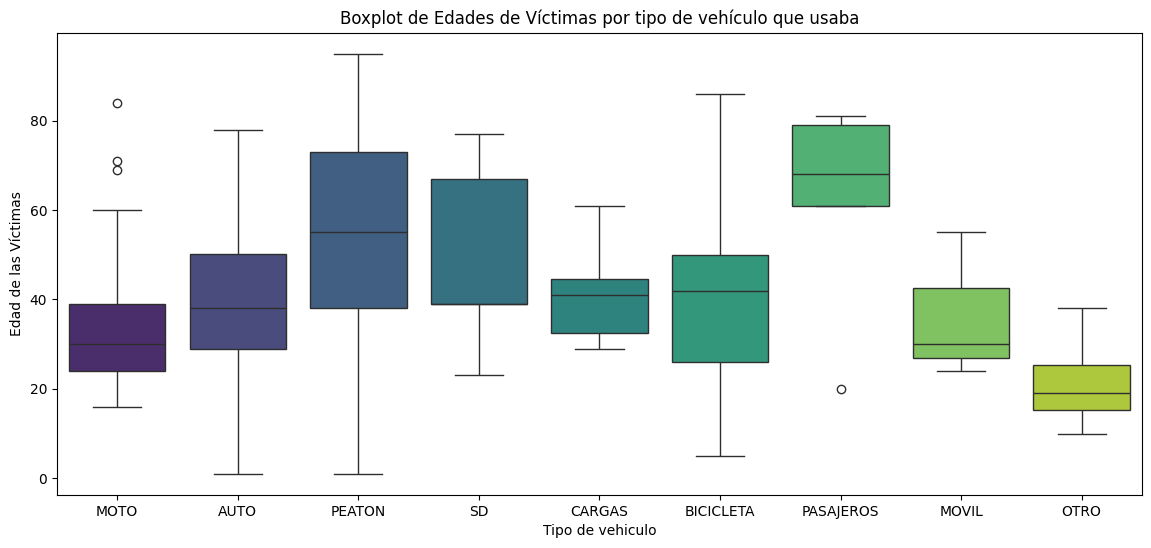

In [136]:
distribucion_edad_por_victima(df_homicidios)

Se observa una gran dispersión de edades de víctimas fallecidas según el vehículo que ocupaban al momento del hecho. En el caso de victimas peatones es donde se observa un rango mas amplio de edades que en las demás categorías. Las victimas de mayor edad se observan mas concentradas cuando son pasajeros y victimas mas joven se observan en moto y otros.

### Participantes en los accidentes

Analizamos las cantidades de victimas en funcion de los vehiculos o medios de transporte que participaron del hecho

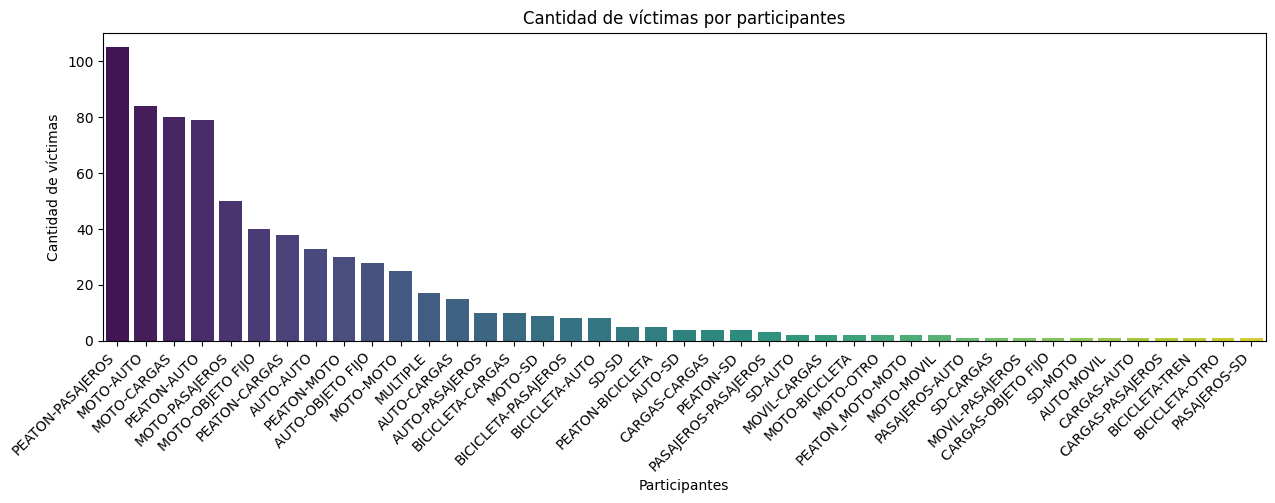

In [137]:
cantidad_victimas_participantes(df_homicidios)

Lo que se interpreta de ver los datos asociados al registro de Participante como Peaton-Pasajero, es que si la víctima es Peatón y el acusado es Pasajero, se debe estar refiriendo que el hecho ocurrió asociado a una persona que subía, bajaba o se trasladaba por algún medio de transporte público. 

Por otra parte, en el gráfico anterior, se llega a apreciar que los hechos que involucran moto, auto y cargas son los que mayor cantidad de víctimas acumulan.

### Acusados en los accidentes

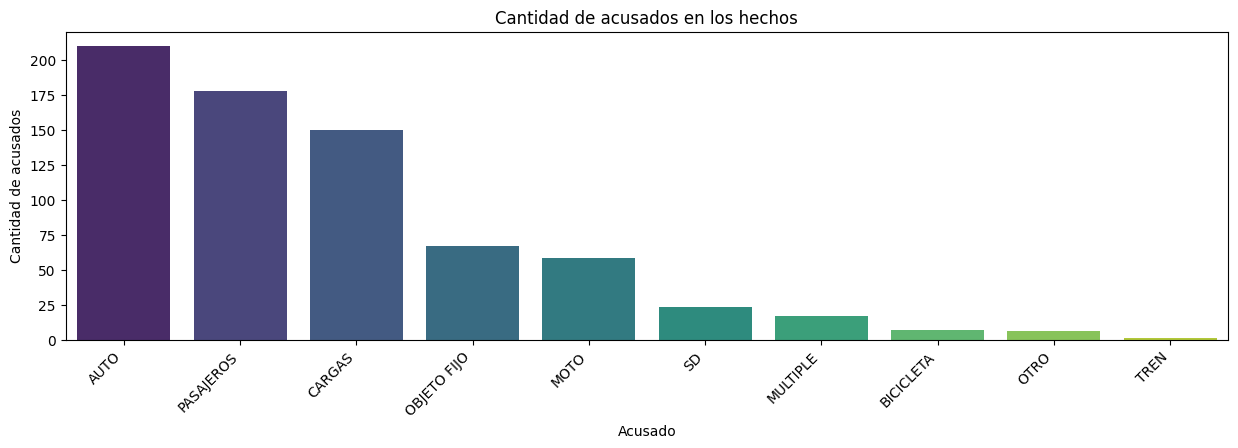

In [138]:
cantidad_acusados(df_homicidios)

Lo que se interpreta de este gráfico es que la mayor responsabilidad en los hechos registrados es de los conductores de autos, seguidas de pasajeros y cargas (éste último se refiere a vehículos de carga). En cuanto a Pasajeros tiene sentido en relación con lo interpretado en el punto anterior, donde el vehículo involucrado es el transporte público, lo que da valides a lo ya escrito.

### Tipo de calles

Buscamos patrones en relacion al tipo de calle donde ocurren los hechos.

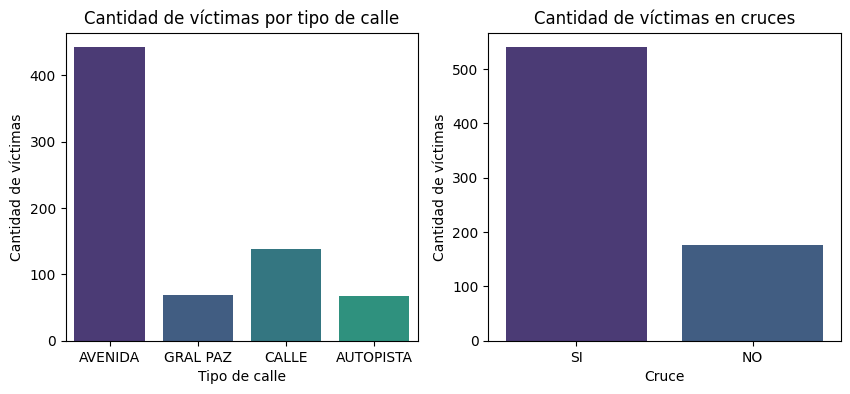

In [139]:
accidentes_tipo_de_calle(df_homicidios)

Se pueden ver que la mayor cantidad de hechos con víctimas fatales ocurren en las avenidas y en particular en los cruces de calles.